In [253]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import requests
import urllib.request 
import os
import json
import seaborn as sns
import yahoo_finance as yahoofin
import yfinance as yf
from yahoofinancials import YahooFinancials
from datetime import date
from pathlib import Path
from dotenv import load_dotenv
from datetime import date
from pandas_datareader import data as pdr

yf.pdr_override()

In [205]:
# Load .env environment variables
load_dotenv()

True

In [206]:
# Set API keys and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
quandl_api_key = os.getenv("QUANDL_API_KEY")
rapid_api_key = os.getenv("RAPID_API_KEY")

In [207]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")
print(f"Quandl Key type: {type(quandl_api_key)}")
print(f"Rapid API Key type: {type(rapid_api_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>
Quandl Key type: <class 'str'>
Rapid API Key type: <class 'NoneType'>


---
## SET INFORMATION
---

In [208]:
# Set timeframe (YYYY-MM-DD)
start_date = '2000-01-01'
today = date.today()

In [252]:
# Set Ticker list
ticker_list = ['SPY','AAPL', 'AMZN', 'ARKK', 'BP','COF', 'CTSH', 'DAL', 'GBTC', 'GE', 'JNJ', 'MSTR', 'NFLX', 'PYPL', 'QCOM','SHOP','UPS','WFC']


In [210]:
# Test on one ticker
msft = yf.Ticker("MSFT")

In [211]:
mfst_earnings = msft.earnings
#print(mfst_earnings)
mfst_earnings.head()

,Earnings,Revenue
Year,,
2017,25489000000,96571000000
2018,16571000000,110360000000
2019,39240000000,125843000000
2020,44281000000,143015000000


In [212]:
# Test Balance Sheet method
msft_balance_sheet = msft.balance_sheet
msft_balance_sheet

,2020-06-30 00:00:00,2019-06-30 00:00:00,2018-06-30 00:00:00,2017-06-30 00:00:00
Accounts Payable,1.253000e+10,9.382000e+09,8.617000e+09,7.390000e+09
Cash,1.357600e+10,1.135600e+10,1.194600e+10,7.663000e+09
Common Stock,8.055200e+10,7.852000e+10,7.122300e+10,6.931500e+10
Deferred Long Term Asset Charges,6.405000e+09,7.536000e+09,1.369000e+09,2.480000e+08
Good Will,4.335100e+10,4.202600e+10,3.568300e+10,3.512200e+10
Intangible Assets,7.038000e+09,7.750000e+09,8.053000e+09,1.010600e+10
Inventory,1.895000e+09,2.063000e+09,2.662000e+09,2.181000e+09
Long Term Debt,5.957800e+10,6.666200e+10,7.224200e+10,7.607300e+10
Long Term Investments,2.965000e+09,2.649000e+09,1.862000e+09,6.023000e+09
Net Receivables,3.201100e+10,2.952400e+10,2.648100e+10,2.243100e+10


---
## COMPANY INFORMATION
---

In [233]:
#function that grabs a Yahoo Finance JSON URL and outputs the results as a dictionary
#Code Ref: https://marqueegroup.ca/resource/how-to-use-python-in-a-finance-environment/

def fnYFinJSON(stock):
  urlData = "https://query2.finance.yahoo.com/v7/finance/quote?symbols="+stock
  webUrl = urllib.request.urlopen(urlData)
  if (webUrl.getcode() == 200):
    data = webUrl.read()
  else:
      print ("Received an error from server, cannot retrieve results " + str(webUrl.getcode()))
  yFinJSON = json.loads(data)
  return yFinJSON["quoteResponse"]["result"][0]

In [245]:
# Create a table based on tickers and company info fields needed
tickers = ticker_list
fields = {'shortName':'Company Name',  
          'fullExchangeName':'Exchange', 
          'marketCap':'Market Cap',
          'regularMarketPrice':'Price',
          'fiftyTwoWeekLow':'52-Wk Low', 
          'fiftyTwoWeekHigh':'52-Wk High',
          'regularMarketDayHigh':'High', 
          'regularMarketDayLow':'Low',
          'epsTrailingTwelveMonths':'EPS(TTM)',
         }
results = {}
for ticker in tickers:
  tickerData = fnYFinJSON(ticker)
  singleResult = {}
  for key in fields.keys():
    if key in tickerData:
      singleResult[fields[key]] = tickerData[key]
    else:
      singleResult[fields[key]] = "N/A"
  results[ticker] = singleResult

In [246]:
# Arrange index according to a specific order
# Code Ref:https://stackoverflow.com/questions/55397178/dataframe-creation-from-dict-index-order

co_info_label = ['Company Name', 
                 'Exchange', 
                 'Market Cap',
                 'Price',
                 'Low',
                 'High', 
                 '52-Wk Low', 
                 '52-Wk High',
                 'EPS(TTM)',
                ]

In [247]:
company_info_df = pd.DataFrame.from_dict(results)
company_info_df = company_info_df.reindex(co_info_label)
company_info_df

,SPY,AAPL,AMZN,ARKK,BP,COF,CTSH,DAL,GBTC,GE,JNJ,MSTR,NFLX,PYPL,QCOM,SHOP,UPS,WFC
Company Name,SPDR S&P 500,Apple Inc.,"Amazon.com, Inc.",ARK Innovation ETF,BP p.l.c.,Capital One Financial Corporati,Cognizant Technology Solutions,"Delta Air Lines, Inc.",GRAYSCALE BITCOIN TRUST BTC,General Electric Company,Johnson & Johnson,MicroStrategy Incorporated,"Netflix, Inc.","PayPal Holdings, Inc.",QUALCOMM Incorporated,Shopify Inc.,"United Parcel Service, Inc.",Wells Fargo & Company
Exchange,NYSEArca,NasdaqGS,NasdaqGS,NYSEArca,NYSE,NYSE,NasdaqGS,NYSE,Other OTC,NYSE,NYSE,NasdaqGS,NasdaqGS,NasdaqGS,NasdaqGS,NYSE,NYSE,NYSE
Market Cap,367672655872,2064936337408,1591768907776,N/A,81283604480,59261444096,41854832640,31160719360,8939524096,116660150272,428684148736,6745043968,238906425344,289913896960,156529426432,141412941824,148913061888,163835969536
Price,400.61,123,3161,120.85,24.58,129.78,78.88,48.83,50.865,13.28,162.83,703.56,539.42,247.54,137.79,1155.41,171.28,39.63
Low,398.2,122.49,3115.55,120.57,24.1,128.37,78.14,48.28,50.15,13.15,162.06,687.457,527.03,246.05,133.6,1137.02,168.83,38.92
High,400.67,124.18,3162.44,124.625,24.607,130.77,79.33,49.205,50.87,13.36,163.84,725.75,540.29,252.64,138.43,1178.98,172.14,39.65
52-Wk Low,248.17,62.345,1930.02,42.02,14.74,45.79,45.39,17.51,7.03,5.48,133.65,109.64,361.71,96.26,67.65,369.3,88.85,20.76
52-Wk High,400.67,145.09,3552.25,159.7,28.57,134.7,82.73,52.28,58.22,14.42,173.65,1315,593.29,309.14,167.94,1499.75,178.01,41.54
EPS(TTM),N/A,3.687,41.83,N/A,-6.024,5.183,2.57,-19.49,N/A,0.576,5.51,-0.78,6.08,3.54,5.85,2.59,1.54,0.41


In [ ]:
# YahooFinancials - Revenue (not working?)
yahoo_financials_tickers = YahooFinancials(ticker_list)
earnings = yahoo_financials_tickers.get_stock_earnings_data()
print(earnings)

---
## HISTORICAL STATISTICAL DATA
---

### Data from year 2000 until present day

In [217]:
# Download historical statistical data = 20 years
stat_data_20yr = yf.download(ticker_list, start='2000-01-01', end = today, group_by='ticker')
stat_data_20yr.describe().round(2)

[*********************100%***********************]  18 of 18 completed


SHOP                                                         GE  \
          Open     High      Low    Close Adj Close       Volume     Open   
count  1478.00  1478.00  1478.00  1478.00   1478.00      1478.00  5346.00   
mean    282.95   289.21   276.02   283.14    283.14   1651370.43    25.29   
std     349.77   357.28   340.33   349.56    349.56   1482658.87    10.75   
min      17.00    17.00    17.00    17.00     17.00         0.00     5.61   
25%      42.70    43.40    41.80    42.47     42.47    821875.00    16.15   
50%     134.54   137.73   130.28   134.26    134.26   1331500.00    25.58   
75%     331.98   341.13   324.44   333.17    333.17   2041300.00    32.44   
max    1475.63  1499.75  1438.03  1474.00   1474.00  20895900.00    57.27   

                                  ...      UPS                     \
          High      Low    Close  ...      Low    Close Adj Close   
count  5346.00  5346.00  5346.00  ...  5346.00  5346.00   5346.00   
mean     25.56    25.00    25.28  ...    82.47    83.20     64.82   
std      10.87    10.64    10.76  ...    24.77    24.94     30.27   
min       5.66     5.48     5.49  ...    37.99    38.30     26.65   
25%      16.38    15.84    16.13  ...    63.50    63.96     42.56   
50%      25.77    25.33    25.56  ...    74.05    74.58     51.23   
75%      32.69    32.21    32.46  ...   101.00   101.69     87.33   
max      58.17    57.15    57.69  ...   174.89   176.54    174.37   

                        COF                                                     
            Volume     Open     High      Low    Close Adj Close        Volume  
count      5346.00  5346.00  5346.00  5346.00  5346.00   5346.00  5.346000e+03  
mean    3390873.16    65.11    65.96    64.24    65.12     56.82  4.131640e+06  
std     2524011.96    20.49    20.43    20.51    20.47     20.74  4.305933e+06  
min      314000.00     7.95     9.34     7.80     8.31      7.07  2.638000e+05  
25%     2099675.00    49.14    50.05    48.25    49.25     40.42  2.004525e+06  
50%     2925800.00    67.24    68.22    66.37    67.26     56.81  2.912950e+06  
75%     4118900.00    80.71    81.35    79.92    80.64     69.69  4.690675e+06  
max    94752600.00   133.95   134.70   131.65   132.60    132.60  1.145744e+08  

[8 rows x 108 columns]

In [218]:
# Past two business weeks
stat_data_20yr.tail(10).round(2)

SHOP                                                     GE  \
               Open     High      Low    Close Adj Close     Volume   Open   
Date                                                                         
2021-03-19  1118.98  1137.36  1104.36  1120.95   1120.95   800700.0  13.20   
2021-03-22  1123.14  1160.83  1120.38  1160.00   1160.00   904100.0  13.16   
2021-03-23  1165.00  1168.47  1142.30  1162.00   1162.00   896700.0  12.96   
2021-03-24  1176.81  1185.00  1102.35  1106.01   1106.01  1070800.0  12.76   
2021-03-25  1090.08  1103.99  1051.25  1061.68   1061.68  1768200.0  12.40   
2021-03-26  1052.60  1084.98  1005.14  1065.21   1065.21  2836900.0  12.95   
2021-03-29  1053.60  1075.83  1028.60  1039.91   1039.91  1055200.0  12.92   
2021-03-30  1028.46  1074.19  1012.80  1048.68   1048.68  1513300.0  12.98   
2021-03-31  1068.01  1119.50  1065.00  1106.50   1106.50  1383800.0  13.38   
2021-04-01  1150.00  1178.98  1137.02  1155.41   1155.41  1160200.0  13.23   

                                 ...     UPS                              \
             High    Low  Close  ...     Low   Close Adj Close    Volume   
Date                             ...                                       
2021-03-19  13.35  12.98  13.22  ...  158.69  159.29    159.29  14422000   
2021-03-22  13.24  12.93  13.13  ...  158.54  161.06    161.06   3893900   
2021-03-23  13.18  12.55  12.66  ...  159.23  159.86    159.86   2920800   
2021-03-24  13.02  12.50  12.50  ...  159.70  159.91    159.91   2285300   
2021-03-25  12.93  12.23  12.85  ...  158.70  163.25    163.25   2944500   
2021-03-26  13.13  12.71  12.99  ...  163.79  167.98    167.98   3133400   
2021-03-29  13.05  12.78  12.95  ...  166.66  168.14    168.14   2702600   
2021-03-30  13.36  12.90  13.30  ...  167.40  168.64    168.64   2401100   
2021-03-31  13.43  13.13  13.13  ...  167.60  169.99    169.99   3688400   
2021-04-01  13.36  13.15  13.28  ...  168.83  171.28    171.28   3615000   

               COF                                             
              Open    High     Low   Close Adj Close   Volume  
Date                                                           
2021-03-19  127.38  128.07  123.95  126.43    126.43  3315900  
2021-03-22  125.48  126.42  124.39  125.22    125.22  2090400  
2021-03-23  123.95  125.33  121.21  122.41    122.41  3862500  
2021-03-24  124.29  126.41  123.53  123.91    123.91  2096700  
2021-03-25  123.37  128.13  121.44  127.87    127.87  2716500  
2021-03-26  129.86  130.49  126.57  129.59    129.59  2863800  
2021-03-29  127.66  128.40  124.95  126.49    126.49  2128500  
2021-03-30  127.22  128.85  126.46  128.56    128.56  2732400  
2021-03-31  128.22  129.47  126.91  127.23    127.23  2389100  
2021-04-01  128.41  130.77  128.21  129.78    129.78  2589000  

[10 rows x 108 columns]

### Closing Prices

In [219]:
# Code Ref: https://alexandrenesovic.com/2019/11/17/how-to-find-import-and-plot-historical-financial-data-with-yfinance-python-and-how-to-calculate-the-daily-returns/
stocks_close_20yr = yf.download(ticker_list,  start='2000-01-01', end = today, period = "1d").Close
stocks_close_20yr.describe().round(2)

[*********************100%***********************]  18 of 18 completed


,AAPL,AMZN,ARKK,BP,COF,CTSH,DAL,GBTC,GE,JNJ,MSTR,NFLX,PYPL,QCOM,SHOP,SPY,UPS,WFC
count,5346.00,5346.00,1615.00,5346.00,5346.00,5346.00,3504.00,1485.00,5346.00,5346.00,5346.00,4748.00,1447.00,5346.00,1478.00,5346.00,5346.00,5346.00
mean,20.00,503.40,42.29,46.84,65.12,32.38,29.74,8.70,25.28,82.50,133.21,93.38,91.14,51.98,283.14,168.01,83.20,35.60
std,26.45,769.77,28.48,12.18,20.47,25.26,18.39,9.70,10.76,32.76,189.70,141.37,57.99,23.18,349.56,70.87,24.94,11.77
min,0.23,5.97,14.78,14.90,8.31,0.83,3.93,0.25,5.49,34.25,4.50,0.37,30.63,11.88,17.00,68.11,38.30,8.12
25%,1.41,42.00,20.98,39.36,49.25,9.66,11.10,1.14,16.13,58.83,65.00,3.87,40.51,37.37,42.47,116.78,63.96,26.03
50%,9.42,140.67,38.23,44.39,67.26,28.25,28.16,7.44,25.56,65.37,109.40,17.26,80.67,49.67,134.26,139.54,74.58,31.50
75%,28.12,574.05,47.27,53.61,80.64,57.14,47.75,11.63,32.46,105.56,143.40,111.50,108.79,64.40,333.17,208.45,101.69,47.36
max,143.16,3531.45,156.58,79.70,132.60,84.83,63.16,56.70,57.69,170.48,3130.00,586.34,304.79,164.78,1474.00,400.61,176.54,65.93


In [232]:
stocks_close_20yr.tail().round(2)

,AAPL,AMZN,ARKK,BP,COF,CTSH,DAL,GBTC,GE,JNJ,MSTR,NFLX,PYPL,QCOM,SHOP,SPY,UPS,WFC
Date,,,,,,,,,,,,,,,,,,
2021-03-26,121.21,3052.03,113.97,25.23,129.59,79.24,47.66,46.43,12.99,164.93,624.00,508.05,241.03,132.99,1065.21,395.98,167.98,39.76
2021-03-29,121.39,3075.73,111.17,25.18,126.49,78.06,47.32,49.45,12.95,166.04,631.34,513.95,235.67,131.27,1039.91,395.78,168.14,38.44
2021-03-30,119.90,3055.29,114.42,24.88,128.56,78.57,48.90,50.82,13.30,165.01,653.98,513.39,236.54,130.11,1048.68,394.73,168.64,39.39
2021-03-31,122.15,3094.08,119.95,24.35,127.23,78.12,48.28,50.04,13.13,164.35,678.80,521.66,242.84,132.59,1106.50,396.33,169.99,39.07
2021-04-01,123.00,3161.00,120.85,24.58,129.78,78.88,48.83,50.87,13.28,162.83,703.56,539.42,247.54,137.79,1155.41,400.61,171.28,39.63


Text(0, 0.5, 'Closing Prices ($)')

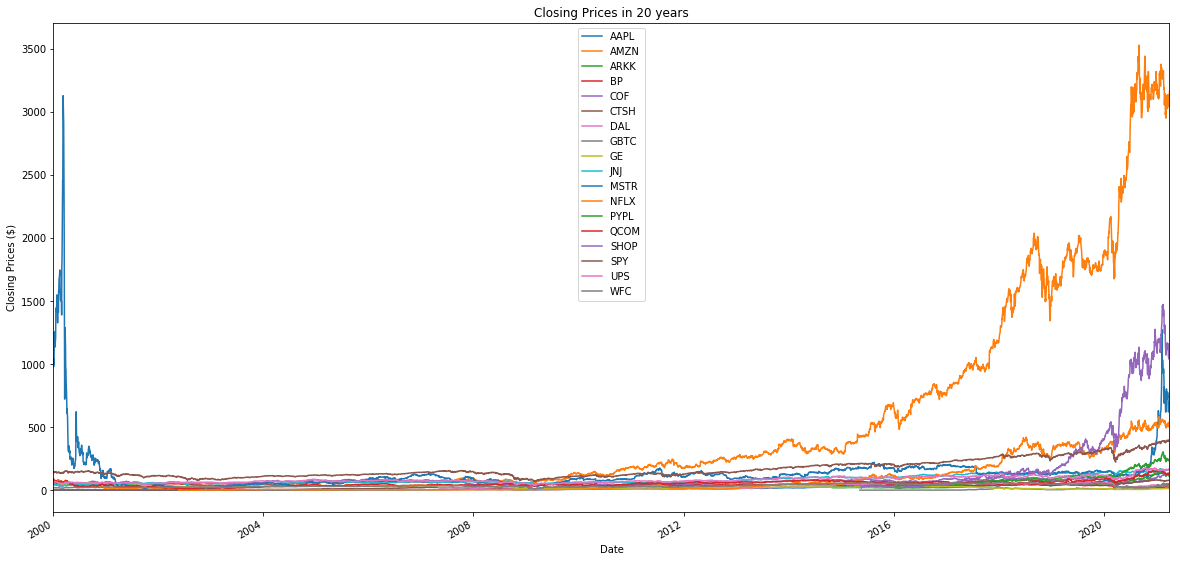

In [221]:
stocks_close_20yr.plot(figsize = (20, 10))

plt.title('Closing Prices in 20 years')
plt.ylabel('Closing Prices ($)')

In [222]:
stocks_close_20yr_mean = yf.download(ticker_list,  start='2000-01-01', end = today, period = "1d", index = 'mean').Close
stocks_close_20yr_mean.describe().round(2)

[*********************100%***********************]  18 of 18 completed


,AAPL,AMZN,ARKK,BP,COF,CTSH,DAL,GBTC,GE,JNJ,MSTR,NFLX,PYPL,QCOM,SHOP,SPY,UPS,WFC
count,5346.00,5346.00,1615.00,5346.00,5346.00,5346.00,3504.00,1485.00,5346.00,5346.00,5346.00,4748.00,1447.00,5346.00,1478.00,5346.00,5346.00,5346.00
mean,20.00,503.40,42.29,46.84,65.12,32.38,29.74,8.70,25.28,82.50,133.21,93.38,91.14,51.98,283.14,168.01,83.20,35.60
std,26.45,769.77,28.48,12.18,20.47,25.26,18.39,9.70,10.76,32.76,189.70,141.37,57.99,23.18,349.56,70.87,24.94,11.77
min,0.23,5.97,14.78,14.90,8.31,0.83,3.93,0.25,5.49,34.25,4.50,0.37,30.63,11.88,17.00,68.11,38.30,8.12
25%,1.41,42.00,20.98,39.36,49.25,9.66,11.10,1.14,16.13,58.83,65.00,3.87,40.51,37.37,42.47,116.78,63.96,26.03
50%,9.42,140.67,38.23,44.39,67.26,28.25,28.16,7.44,25.56,65.37,109.40,17.26,80.67,49.67,134.26,139.54,74.58,31.50
75%,28.12,574.05,47.27,53.61,80.64,57.14,47.75,11.63,32.46,105.56,143.40,111.50,108.79,64.40,333.17,208.45,101.69,47.36
max,143.16,3531.45,156.58,79.70,132.60,84.83,63.16,56.70,57.69,170.48,3130.00,586.34,304.79,164.78,1474.00,400.61,176.54,65.93


### Adjusted Closing Prices

In [223]:
# Code Ref: https://stackoverflow.com/questions/38133064/get-adj-close-using-pandas-datareader
stocks_adjclose_20yr = yf.download(ticker_list,  start='2000-01-01', end = today, period = "1d")['Adj Close']
stocks_adjclose_20yr.describe().round(2)

[*********************100%***********************]  18 of 18 completed


,AAPL,AMZN,ARKK,BP,COF,CTSH,DAL,GBTC,GE,JNJ,MSTR,NFLX,PYPL,QCOM,SHOP,SPY,UPS,WFC
count,5346.00,5346.00,1615.00,5346.00,5346.00,5346.00,3504.00,1485.00,5346.00,5346.00,5346.00,4748.00,1447.00,5346.00,1478.00,5346.00,5346.00,5346.00
mean,18.97,503.40,40.86,26.11,56.82,31.18,27.74,8.70,18.09,66.10,133.21,93.38,91.14,42.14,283.14,143.33,64.82,27.58
std,26.29,769.77,28.70,5.77,20.74,24.50,17.76,9.70,5.96,37.64,189.70,141.37,57.99,24.11,349.56,78.46,30.27,12.70
min,0.20,5.97,13.86,14.27,7.07,0.80,3.49,0.25,4.64,19.99,4.50,0.37,30.63,8.15,17.00,53.33,26.65,5.96
25%,1.21,42.00,19.44,21.37,40.42,9.23,9.86,1.14,13.00,38.31,65.00,3.87,40.51,26.56,42.47,86.82,42.56,18.19
50%,8.11,140.67,36.46,25.77,56.81,26.98,26.96,7.44,18.84,46.23,109.40,17.26,80.67,37.42,134.26,106.86,51.23,23.24
75%,26.06,574.05,45.57,30.69,69.69,54.99,44.26,11.63,22.11,89.79,143.40,111.50,108.79,52.61,333.17,187.06,87.33,41.03
max,142.95,3531.45,156.58,39.94,132.60,81.73,62.26,56.70,32.08,169.42,3130.00,586.34,304.79,164.00,1474.00,400.61,174.37,59.02


### Daily Returns

In [224]:
daily_returns_20yr = stocks_adjclose_20yr.pct_change()
daily_returns_20yr.describe().round(5)

,AAPL,AMZN,ARKK,BP,COF,CTSH,DAL,GBTC,GE,JNJ,MSTR,NFLX,PYPL,QCOM,SHOP,SPY,UPS,WFC
count,5345.00000,5345.00000,1614.00000,5345.00000,5345.00000,5345.00000,3503.00000,1484.00000,5345.00000,5345.00000,5345.00000,4747.00000,1446.00000,5345.00000,1477.00000,5345.00000,5345.00000,5345.00000
mean,0.00127,0.00118,0.00134,0.00020,0.00069,0.00108,0.00087,0.00483,0.00010,0.00041,0.00087,0.00194,0.00156,0.00051,0.00349,0.00034,0.00039,0.00054
std,0.02555,0.03237,0.01930,0.01903,0.03003,0.02777,0.03428,0.06001,0.02127,0.01237,0.04361,0.03608,0.02203,0.02697,0.03620,0.01251,0.01493,0.02468
min,-0.51869,-0.24766,-0.15571,-0.19104,-0.39763,-0.23965,-0.25992,-0.28552,-0.15159,-0.15846,-0.61742,-0.40906,-0.15824,-0.16848,-0.17552,-0.10942,-0.10250,-0.23822
25%,-0.01036,-0.01195,-0.00775,-0.00858,-0.01108,-0.01046,-0.01360,-0.02630,-0.00868,-0.00509,-0.01314,-0.01435,-0.00904,-0.01097,-0.01443,-0.00463,-0.00617,-0.00811
50%,0.00089,0.00052,0.00225,0.00029,0.00032,0.00057,0.00085,0.00000,0.00000,0.00031,0.00011,0.00034,0.00135,0.00018,0.00324,0.00068,0.00000,0.00016
75%,0.01318,0.01378,0.01100,0.00884,0.01214,0.01252,0.01451,0.03292,0.00874,0.00614,0.01336,0.01731,0.01261,0.01169,0.02132,0.00594,0.00687,0.00857
max,0.13905,0.34471,0.10421,0.21605,0.26430,0.20235,0.26552,0.41156,0.19703,0.12229,0.76431,0.42224,0.14110,0.23207,0.51059,0.14520,0.14376,0.32765


Text(0, 0.5, 'Percent')

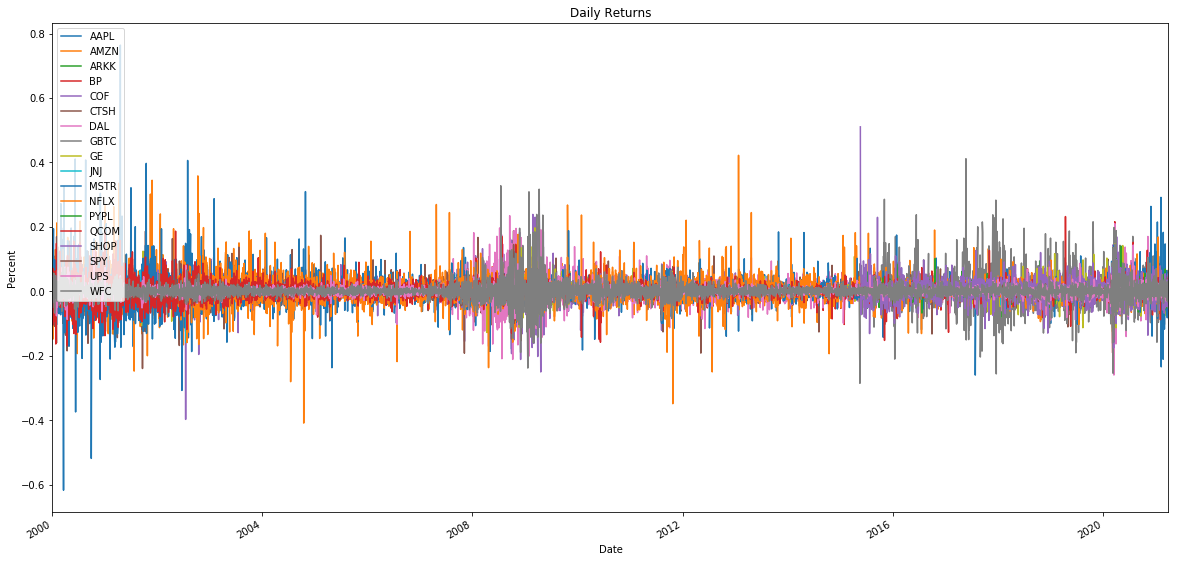

In [225]:
daily_returns_20yr.plot(figsize = (20, 10))
plt.title('Daily Returns')
plt.ylabel('Percent')

In [226]:
# Average Daily Returns
daily_returns_20yr_mean = daily_returns_20yr.mean().round(5)
print(daily_returns_20yr_mean)
#daily_returns_20yr_mean.head().round(5)

AAPL    0.00127
AMZN    0.00118
ARKK    0.00134
BP      0.00020
COF     0.00069
CTSH    0.00108
DAL     0.00087
GBTC    0.00483
GE      0.00010
JNJ     0.00041
MSTR    0.00087
NFLX    0.00194
PYPL    0.00156
QCOM    0.00051
SHOP    0.00349
SPY     0.00034
UPS     0.00039
WFC     0.00054
dtype: float64


Text(0.5, 0, 'Percent')

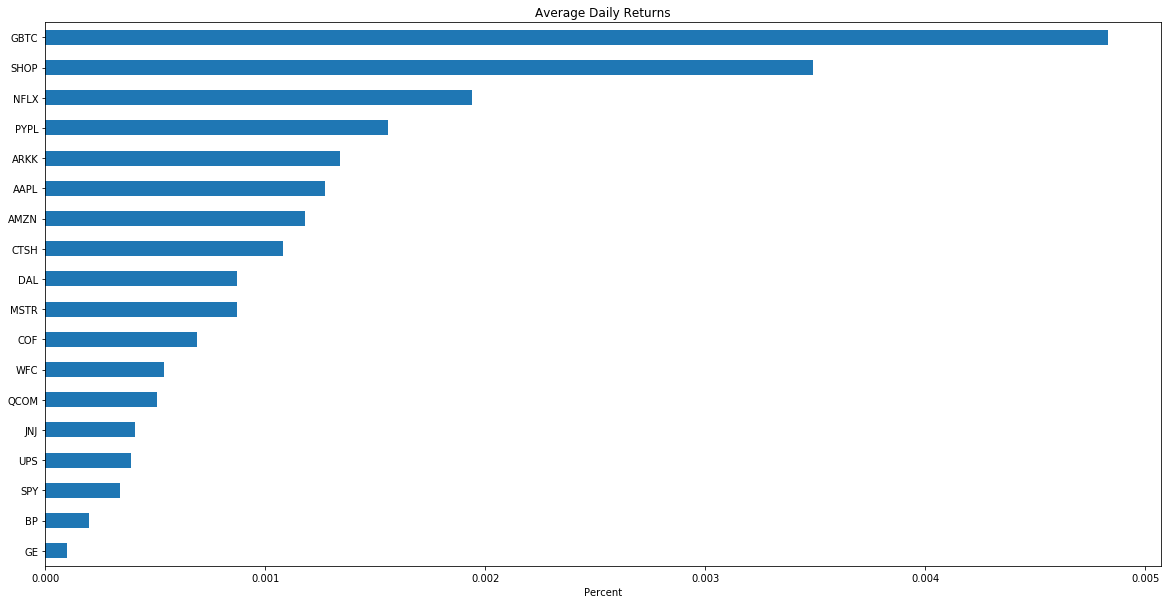

In [227]:
daily_returns_20yr_mean.sort_values().plot(kind='barh',figsize = (20, 10))
plt.title('Average Daily Returns')
plt.xlabel('Percent')

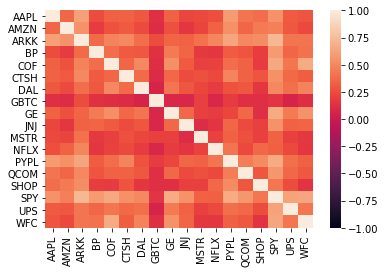

In [228]:
daily_returns_correlation = daily_returns_20yr.corr()
sns.heatmap(daily_returns_correlation, vmin=-1, vmax=1)